# Import necesarry modules  

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Fisher_CMB import *
from Models.SPT3G.spt3G_model import spt3G_model
from Models.Planck.Planck_model import planck_model
import pickle as p
from Covariances.create_basic_cov import *
import pandas as pd
import cosmoslik as K
import matplotlib.lines as mlines

# Load all Planck and SPT Fisher Matrices

In [3]:
F=p.load(open('Saved_Fisher_Matrices/All_Planck_and_SPT3G_Fisher_matrices.p','rb'))

# Define needed functions 

## Calculate Covariance

In [4]:
def Fcov(model,obs,p=None):
    
    df=F[model][obs]
    if p!=None:
        return pd.DataFrame(inv(df.as_matrix()),index=df.columns,columns=df.columns)[p].loc[p]
    else:
        return pd.DataFrame(inv(df.as_matrix()),index=df.columns,columns=df.columns)

## For Plots

In [5]:
def contour_range(mu,std,nsig=10,points=1000):
    return linspace(mu-nsig*std,mu+nsig*std,points)

In [6]:
def sig_contours(mu,sigma,colors='k',ax=None):
    x=contour_range(mu[0],sqrt(sigma[0,0]))
    y=contour_range(mu[1],sqrt(sigma[1,1]))
    X,Y=meshgrid(x,y)
    Z = bivariate_normal(X, Y, sigmax=sqrt(sigma[0,0]), sigmay=sqrt(sigma[1,1]),
                      mux=mu[0], muy=mu[1],sigmaxy=sigma[0,1])
    z1 = bivariate_normal(mu[0]+sqrt(sigma[0,0])*1, mu[1], sigmax=sqrt(sigma[0,0]), sigmay=sqrt(sigma[1,1]),
                      mux=mu[0], muy=mu[1],sigmaxy=sigma[0,1])
    z2 = bivariate_normal(mu[0]+sqrt(sigma[0,0])*2, mu[1], sigmax=sqrt(sigma[0,0]), sigmay=sqrt(sigma[1,1]),
                      mux=mu[0], muy=mu[1],sigmaxy=sigma[0,1])
        
    if ax ==None:
        return contour(Y,X,Z,[z2,z1],colors=colors)
    else:
        return ax.contour(Y, X, Z,[z2,z1],colors=colors)
        


In [7]:
def plot_contours(sigma, mu = None, sigmas = [], xlimits=None,ylimits=None, xlab = None,ylab=None,titl=None,contour_labels=None):
    
    if not mu:mu=[0,0]
    matplotlib.rc('text', usetex = True)
    figure()
    sig_contours(mu,sigma,colors = 'k')
    marks_c=[mlines.Line2D([], [], color='k')]
    colors=  ['r','b','g','c','m','y']
    for i,s in enumerate(sigmas):
        sig_contours(mu,s,colors = colors[i])
        marks_c.append(mlines.Line2D([], [], color=colors[i]))
    
    if contour_labels: legend(marks_c,contour_labels,fontsize = 12,frameon=False)
    if ylimits:ylim(ylimits)
    if xlimits:xlim(xlimits)
    if xlab: xlabel(xlab, fontsize=14)
    if ylab: ylabel(ylab, fontsize=14)
    if titl: title(titl)
    tight_layout()
    
  

# Plots

In [8]:
for i in F['lcdm_neff'].transpose().index.levels[0]:
    print(i)

Planck_TTTEEE_lowTEB
Planck_TTTEEE_lowTEB_SPT3G_fsky_0.035
Planck_TTTEEE_lowTEB_SPT3G_fsky_0.06
Planck_TTTEEE_lowTEB_SPT3G_lensing_fsky_0.035
Planck_TTTEEE_lowTEB_SPT3G_lensing_fsky_0.06
Planck_TT_lmax_800
Planck_TT_lmax_800_SPT3G_fsky_0.035
Planck_TT_lmax_800_SPT3G_fsky_0.06
Planck_TT_lmax_800_SPT3G_lensing_fsky_0.035
Planck_TT_lmax_800_SPT3G_lensing_fsky_0.06
SPT3G_clphiphi_fsky_0.035
SPT3G_clphiphi_fsky_0.06
SPT3G_fsky_0.035
SPT3G_fsky_0.06
SPT3G_lensing_fsky_0.035
SPT3G_lensing_fsky_0.06


<IPython.core.display.Javascript object>


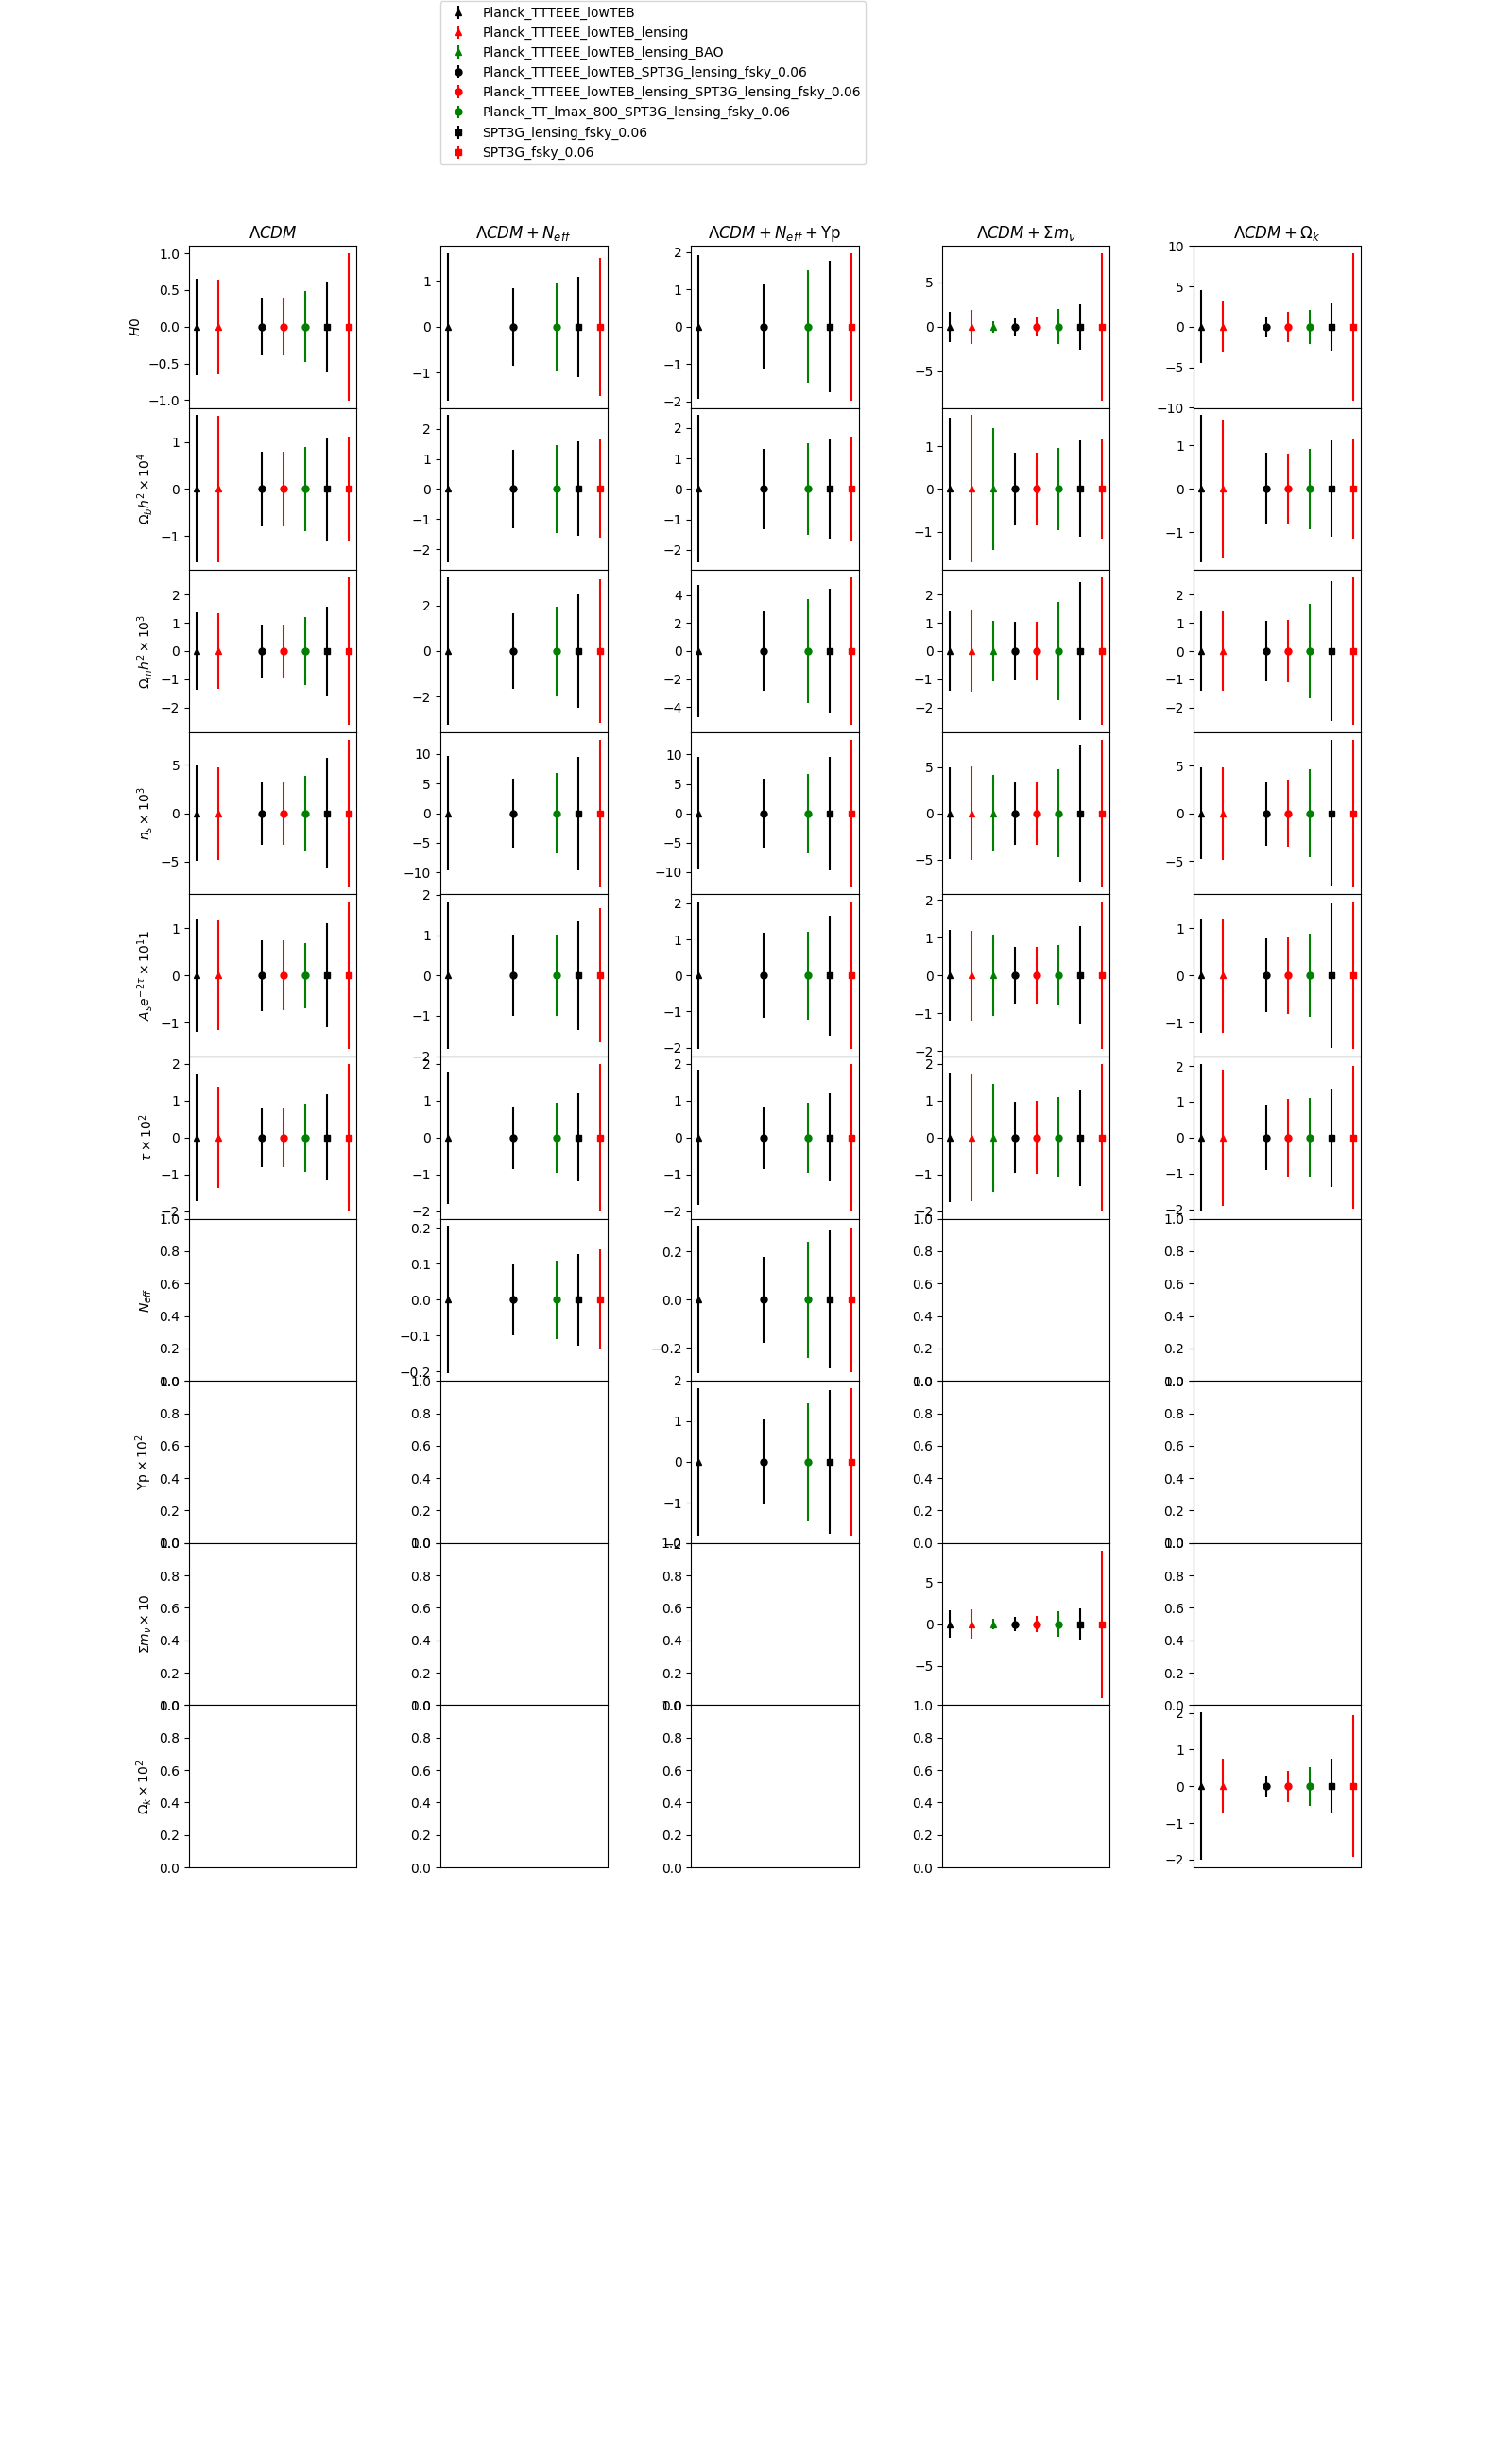

In [15]:

params=['H0','ombh2','ommh2','ns','clamp','tau','nnu','YHe','mnu','omk']

param_labels=dict(zip(params,[r'$H0$',r'$\Omega_bh^2\times10^4$',r'$\Omega_mh^2\times10^3$',r'$n_s\times10^3$',
                              r'$A_se^{-2\tau}\times10^11$',r'$\tau\times10^2$',
              r'$N_{eff}$',r'$\rm{Yp}\times10^2$',r'$\Sigma m_{\nu}\times10$',r'$\Omega_k\times10^2$']))

models=['lcdm_','lcdm_neff','lcdm_neff_yp','lcdm_mnu','lcdm_omk']

model_labels=dict(zip(models,[r'$\Lambda CDM$',r'$\Lambda CDM+N_{eff}$',r'$\Lambda CDM+N_{eff}+\rm{Yp}$',
       r'$\Lambda CDM+\Sigma m_{\nu}$',r'$\Lambda CDM+\Omega_k$']))

experiments=['Planck_TTTEEE_lowTEB',
             'Planck_TTTEEE_lowTEB_lensing',
             'Planck_TTTEEE_lowTEB_lensing_BAO',
             'Planck_TTTEEE_lowTEB_SPT3G_lensing_fsky_0.06',
             'Planck_TTTEEE_lowTEB_lensing_SPT3G_lensing_fsky_0.06',
             'Planck_TT_lmax_800_SPT3G_lensing_fsky_0.06',
             'SPT3G_lensing_fsky_0.06',
             'SPT3G_fsky_0.06']

fmts=['^k','^r','^g','ok','or','og','sk','sr']

scale=[1,1e4,1e3,1e3,1e2,1e2,1,1e2,1e1,1e2]

fig, ax=subplots(len(params),len(F.keys()),figsize=(16,26), sharex=True)

for i,param in enumerate(params):
    for j,model in enumerate(models):
        for k,ex in enumerate(experiments):
            try:
                ax[i,j].errorbar(k,0,yerr=sqrt(Fcov(model,ex,param))*scale[i],label=ex,fmt=fmts[k],ms=5)
            except KeyError:
                continue
        ax[i,j].set_xticks([])
        ax[i,0].set_ylabel(param_labels[param])
        ax[0,j].set_title(model_labels[model])
        
fig.subplots_adjust(bottom=.24,wspace=0.5,hspace=0,top=.9)
ax[0,3].legend(loc=(-3,1.5))
savefig('Figures/Planck_SPT3G_constraints_on_cosmology.pdf')

<IPython.core.display.Javascript object>


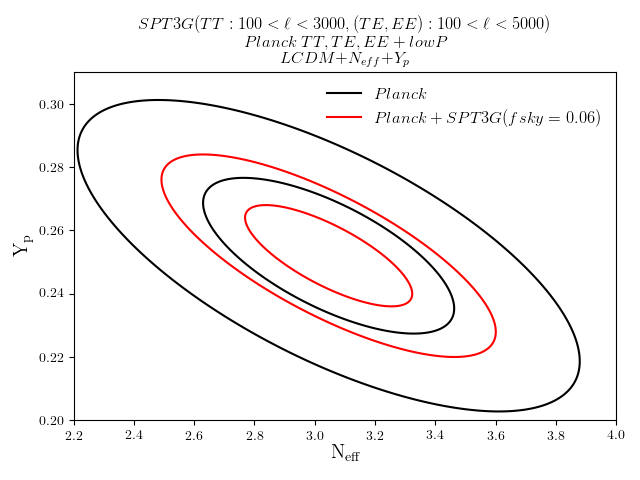

In [38]:
plot_contours(Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB',['YHe','nnu']).as_matrix(),
             mu = [.252,3.046],
             sigmas=[Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB_SPT3G_fsky_0.06',['YHe','nnu']).as_matrix()],
             xlimits=(2.2,4),
             ylimits=(.2,.31),
             xlab = r'$\rm{N}_{\rm{eff}}$',
             ylab = r'$\rm{Y}_{\rm{p}}$',
             titl='$SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$'+ \
                   '\n $Planck$ $TT, TE, EE +lowP$'+ \
                   '\n $LCDM$+$N_{eff}$+$Y_p$',
             contour_labels=[r'$Planck $',
                r'$Planck +SPT3G(fsky=0.06)$'])



<IPython.core.display.Javascript object>


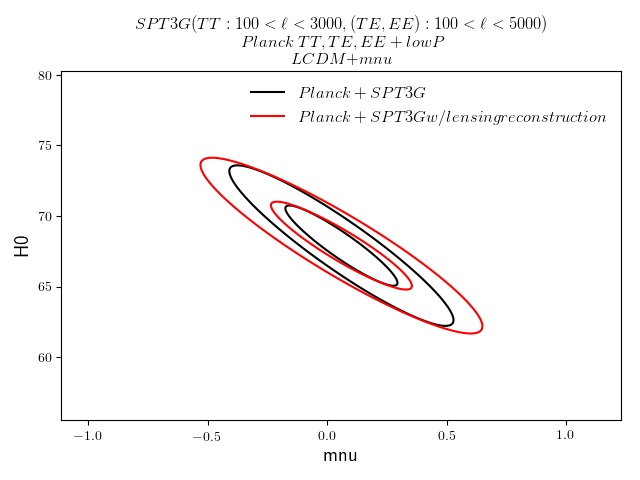

In [86]:
plot_contours(Fcov('lcdm_mnu','Planck_TTTEEE_lowTEB_SPT3G_lensing_fsky_0.06',['H0','mnu']).as_matrix(),
             mu = [67.9,.06],
             sigmas=[Fcov('lcdm_mnu','Planck_TTTEEE_lowTEB_SPT3G_fsky_0.035',['H0','mnu']).as_matrix()],
             xlab = 'mnu',
             ylab = 'H0',
             titl='$SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$'+ \
'\n $Planck$ $TT, TE, EE +lowP$'+ \
'\n $LCDM$+$mnu$',
             contour_labels=[r'$Planck+SPT3G$',
                r'$Planck +SPT3G w/ lensing reconstruction$'])

savefig('Figures/mmnu_H0_constraints_planckSPT3G_lensing_recon.pdf')

<IPython.core.display.Javascript object>


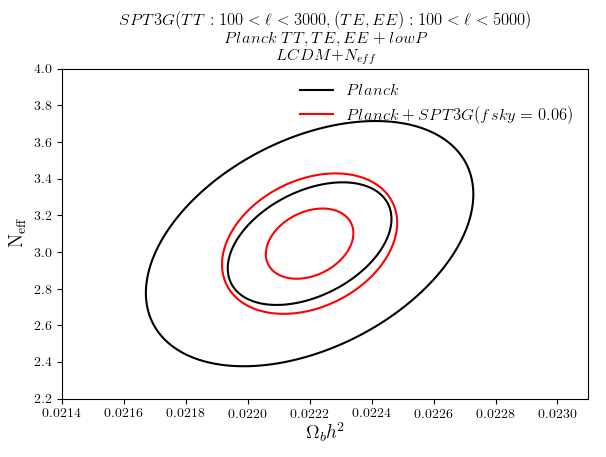

In [84]:
plot_contours(Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB',['nnu','ombh2']).as_matrix(),
             mu = [3.046,0.0222],
             sigmas=[ Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB_SPT3G_fsky_0.06',['nnu','ombh2']).as_matrix()],
             xlimits=(.0214,.0231),
             ylimits=(2.2,4.),
             xlab = r'$\Omega_bh^2$',
             ylab = r'$\rm{N}_{\rm{eff}}$',
             titl='$SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$'+ \
'\n $Planck$ $TT, TE, EE +lowP$'+ \
'\n $LCDM$+$N_{eff}$',
             contour_labels=[r'$Planck $',
                r'$Planck +SPT3G(fsky=0.06)$'])


savefig('Figures/Neff_ombh2_constraints_planck_and_planckSPT3G.pdf')

<IPython.core.display.Javascript object>


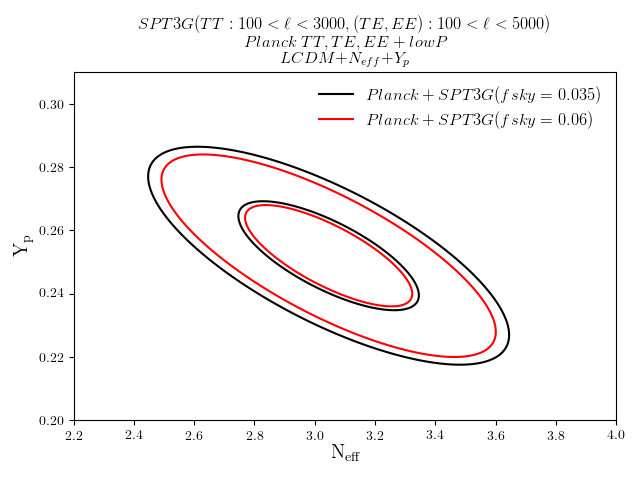

In [70]:
plot_contours(Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB_SPT3G_fsky_0.035',['YHe','nnu']).as_matrix(),
             mu = [.252,3.046],
             sigmas=[ Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB_SPT3G_fsky_0.06',['YHe','nnu']).as_matrix()],
             xlimits=(2.2,4),
             ylimits=(.2,.31),
             xlab = r'$\rm{N}_{\rm{eff}}$',
             ylab = r'$\rm{Y}_{\rm{p}}$',
             titl='$SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$'+ \
'\n $Planck$ $TT, TE, EE +lowP$'+ \
'\n $LCDM$+$N_{eff}$+$Y_p$',
             contour_labels=[r'$Planck +SPT3G(fsky=0.035)$',
                r'$Planck +SPT3G(fsky=0.06)$'])

savefig('Figures/Yp_Neff_constraints_fsky0.06_0.035.pdf')

<IPython.core.display.Javascript object>


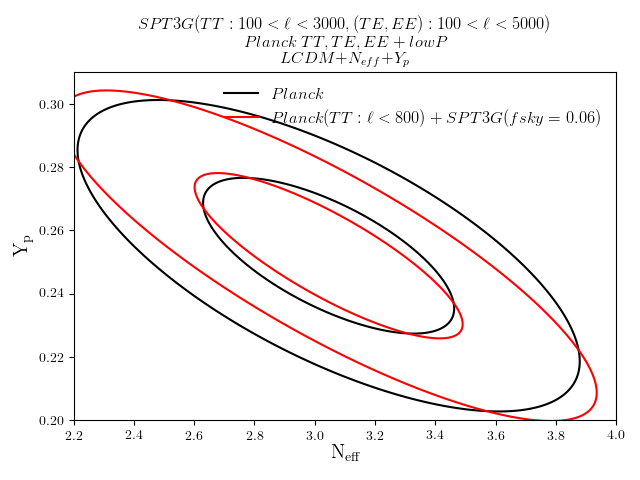

In [71]:
plot_contours(Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB',['YHe','nnu']).as_matrix(),
             mu = [.252,3.046],
             sigmas=[Fcov('lcdm_neff_yp','Planck_TT_lmax_800_SPT3G_fsky_0.06',['YHe','nnu']).as_matrix()],
             xlimits=(2.2,4),
             ylimits=(.2,.31),
             xlab = r'$\rm{N}_{\rm{eff}}$',
             ylab = r'$\rm{Y}_{\rm{p}}$',
             titl='$SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$'+ \
'\n $Planck$ $TT, TE, EE +lowP$'+ \
'\n $LCDM$+$N_{eff}$+$Y_p$',
             contour_labels=[r'$Planck $',
                r'$Planck(TT:\ell<800) +SPT3G(fsky=0.06)$'])


savefig('Figures/Yp_Neff_constraints_planck_and_planck_800SPT3G.pdf')

<IPython.core.display.Javascript object>


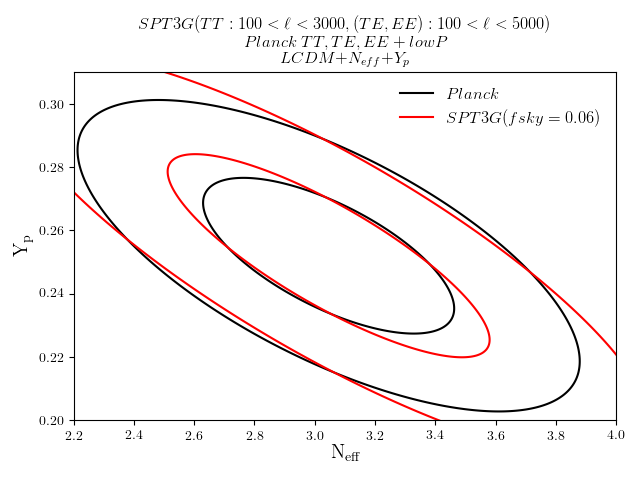

In [72]:
plot_contours(Fcov('lcdm_neff_yp','Planck_TTTEEE_lowTEB',['YHe','nnu']).as_matrix(),
             mu = [.252,3.046],
             sigmas=[Fcov('lcdm_neff_yp','SPT3G_fsky_0.06',['YHe','nnu']).as_matrix()],
             xlimits=(2.2,4),
             ylimits=(.2,.31),
             xlab = r'$\rm{N}_{\rm{eff}}$',
             ylab = r'$\rm{Y}_{\rm{p}}$',
             titl='$SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$'+ \
'\n $Planck$ $TT, TE, EE +lowP$'+ \
'\n $LCDM$+$N_{eff}$+$Y_p$',
             contour_labels=[r'$Planck $',
                r'$SPT3G(fsky=0.06)$'])


savefig('Figures/Yp_Neff_constraints_planck_and_SPT3G.pdf')

## Compare SPT3G+Planck andSPTSZ+Planck

In [59]:
PSZ_params = dot(Fp_lcdm.as_matrix(),Planck_chain.mean(sorted(['H0','ombh2','ommh2','tau','clamp','ns'])))+\
dot(Fsz_lcdm.as_matrix(),SPTSZ_chain.mean(sorted(['H0','ombh2','ommh2','tau','clamp','ns'])))

PSZ_params=dict(zip(sorted(['H0','ombh2','ommh2','tau','clamp','ns']),dot(inv(Fpsz_lcdm.as_matrix()),PSZ_params)))


<IPython.core.display.Javascript object>


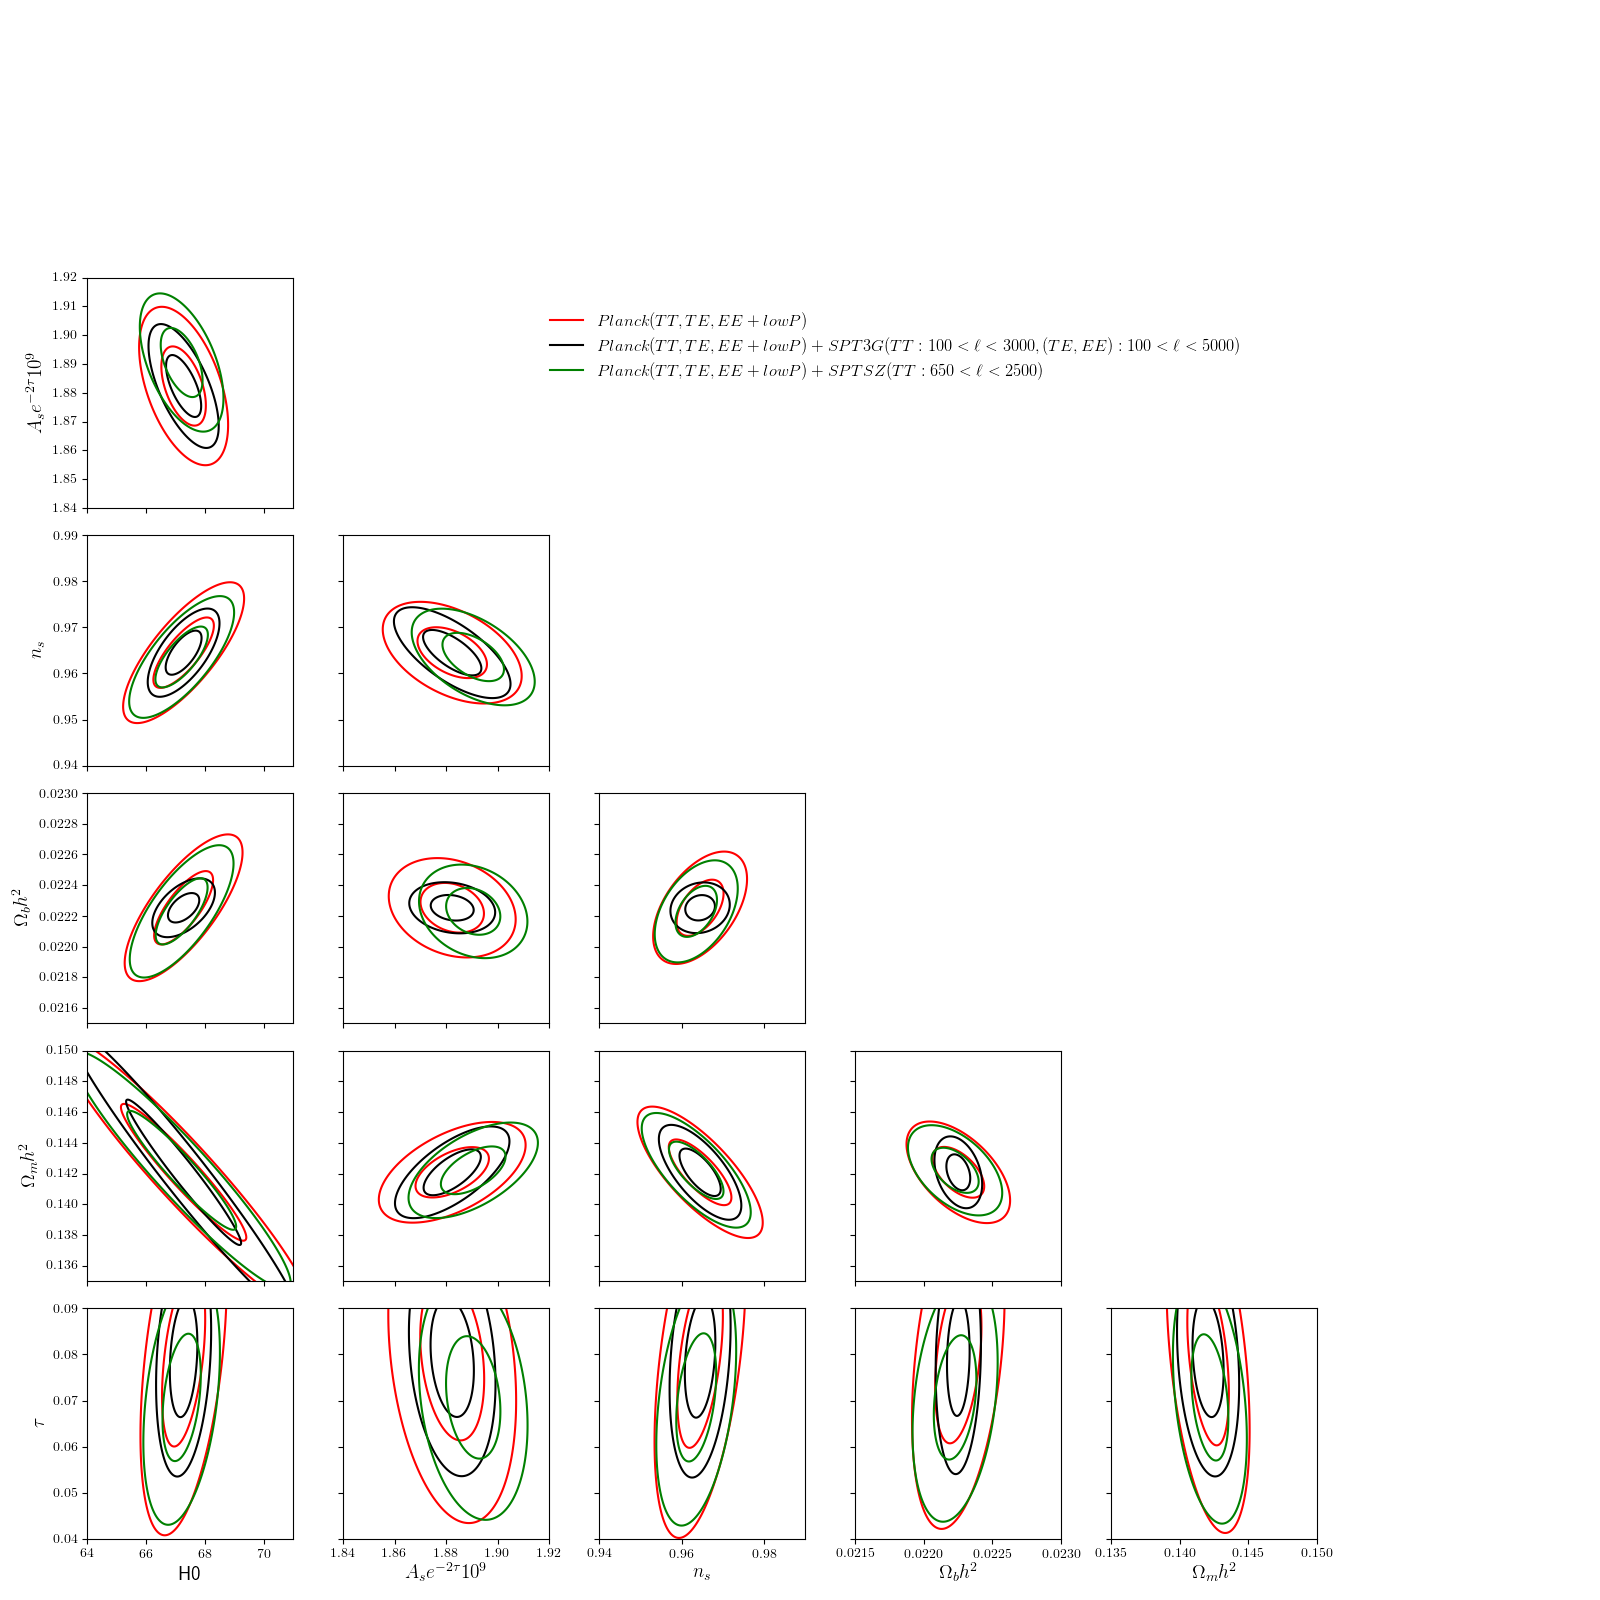

In [71]:
import matplotlib.lines as mlines
convert_names={'H0':'H0','clamp':r'$A_se^{-2 \tau}10^9$','ns':r'$n_s$','ombh2':'$\Omega_bh^2$',
               'ommh2':'$\Omega_mh^2$','tau':r'$\tau$'}
scale={'H0':(64,71),'clamp':(1.84,1.92),'ns':(.94,.99),'ombh2':(.0215,.023),
        'ommh2':(.135,.15),'tau':(.04,.09)}
params=Covp_lcdm.keys()
fig, axes=subplots(len(params),len(params),figsize=(16,16),sharey='row',sharex='col')

for i,p1 in enumerate(params):
    for j,p2 in enumerate(params):
        if i>j:
            sigmap = Covp_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            sigmaps = Covps_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            sigmapsz = Covpsz_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()

            matplotlib.rc('text', usetex = True)

            sig_contours(Planck_chain.mean([p1,p2]),sigmap,colors = 'r',ax=axes[i,j])
            sig_contours(Planck_chain.mean([p1,p2]),sigmaps,colors = 'k',ax=axes[i,j])
            sig_contours([PSZ_params[p1],PSZ_params[p2]],sigmapsz,colors = 'g',ax=axes[i,j])

            axes[-1,j].set_xlabel(convert_names[p2], fontsize=14)
            axes[i,0].set_ylabel(convert_names[p1], fontsize=14)
            axes[i,0].set_ylim(scale[p1])
            axes[-1,j].set_xlim(scale[p2])
        else:
            axes[i,j].axis('off')

a=mlines.Line2D([], [], color='r')
b=mlines.Line2D([], [], color='k')
c=mlines.Line2D([], [], color='g')

legend([a,b,c],[r'$Planck(TT,TE,EE+lowP)$',
                r'$Planck(TT,TE,EE+lowP)+SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$',
                r'$Planck(TT,TE,EE+lowP)+SPTSZ(TT:650<\ell<2500)$'],loc = (-4,5),fontsize = 12,frameon=False)
tight_layout()
savefig('Figures/Param_constraints_planck_planckSPTSZ_planckSPT3G.pdf')

<IPython.core.display.Javascript object>


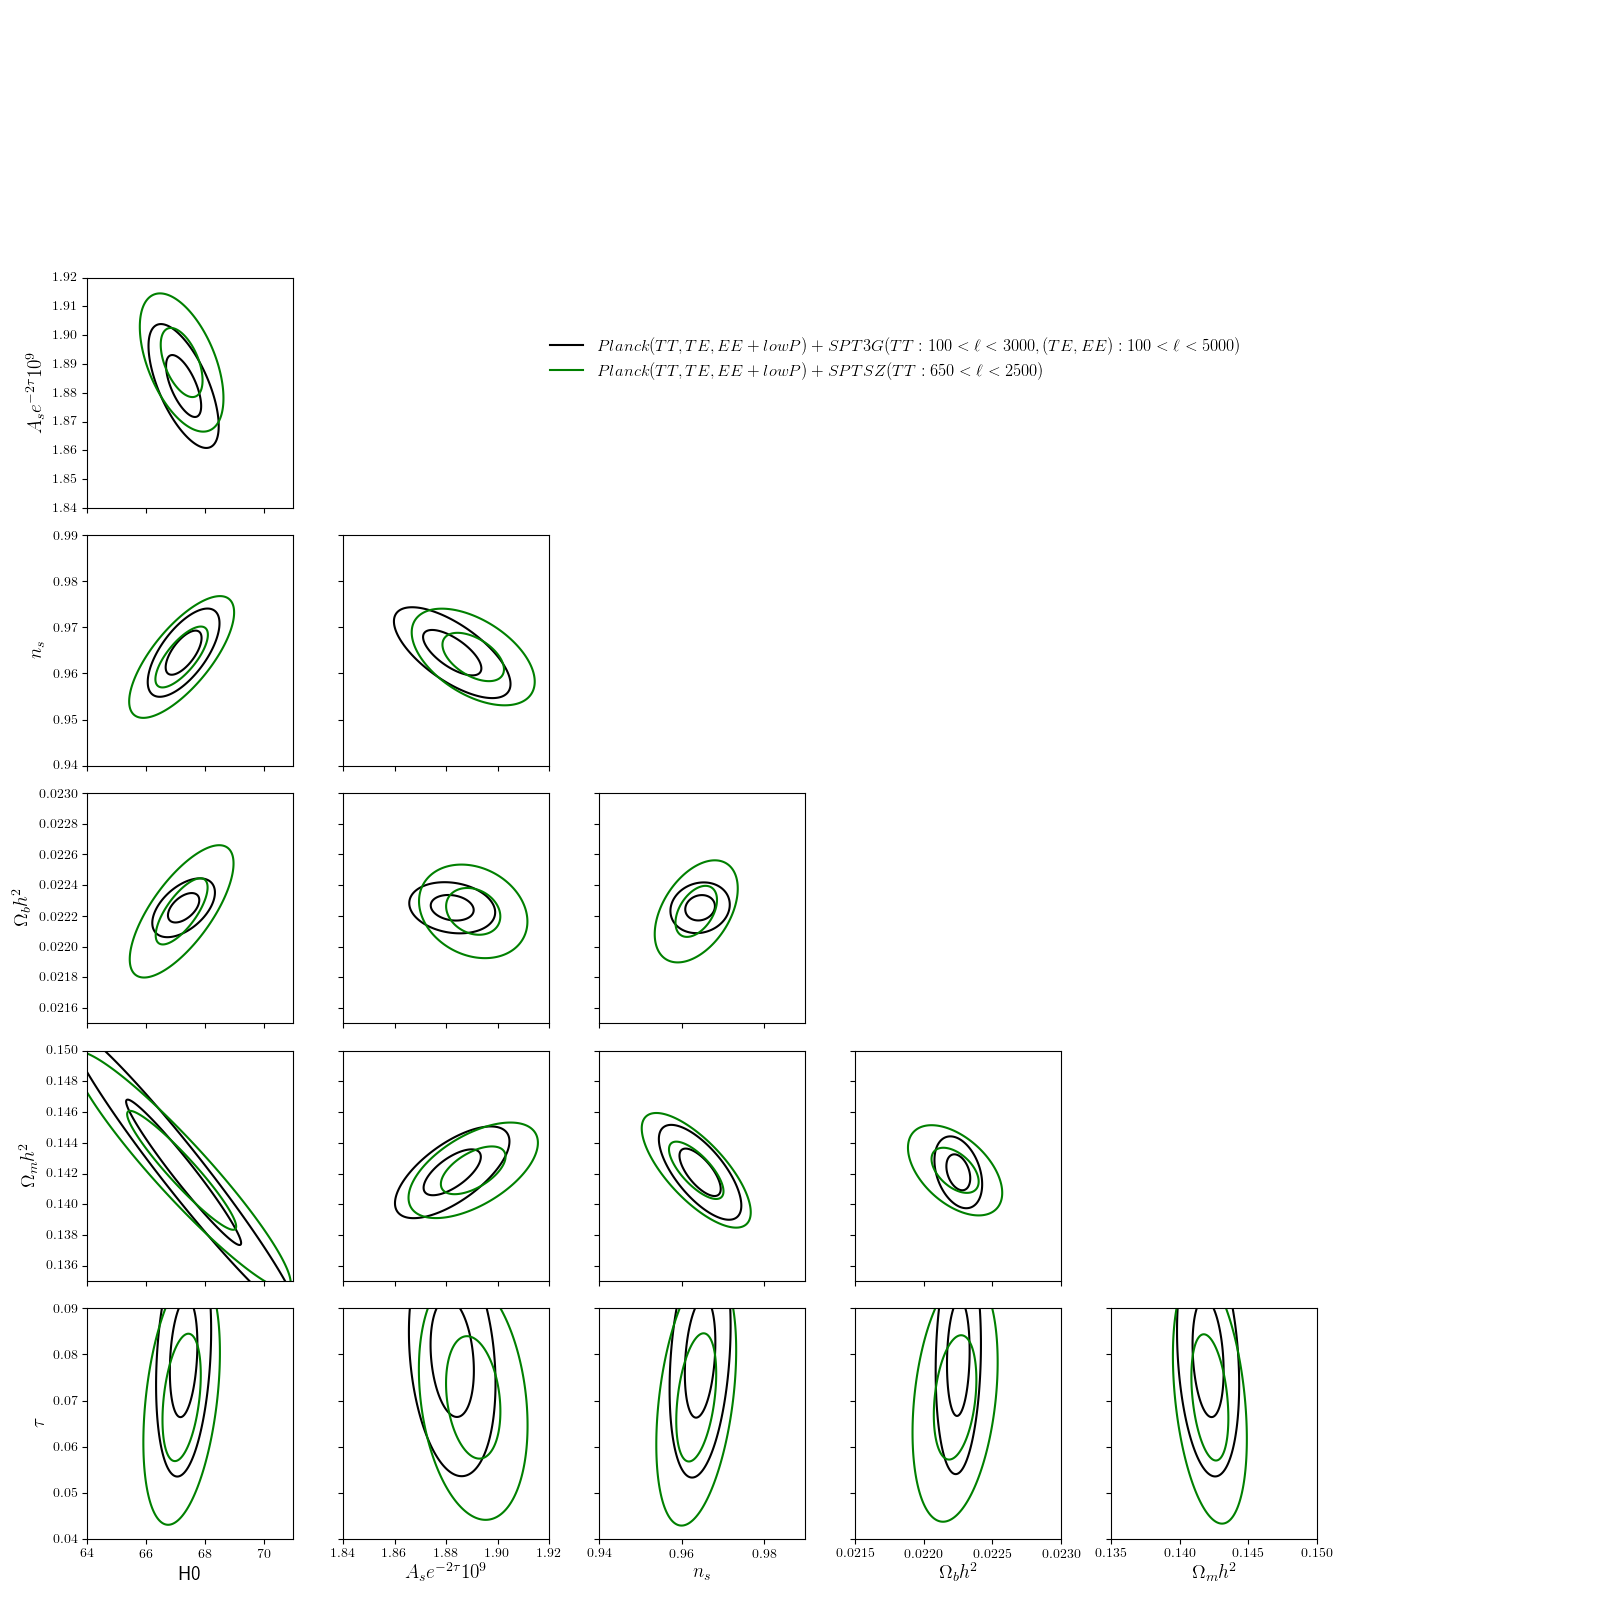

In [72]:
import matplotlib.lines as mlines
convert_names={'H0':'H0','clamp':r'$A_se^{-2 \tau}10^9$','ns':r'$n_s$','ombh2':'$\Omega_bh^2$',
               'ommh2':'$\Omega_mh^2$','tau':r'$\tau$'}
scale={'H0':(64,71),'clamp':(1.84,1.92),'ns':(.94,.99),'ombh2':(.0215,.023),
        'ommh2':(.135,.15),'tau':(.04,.09)}
params=Covp_lcdm.keys()
fig, axes=subplots(len(params),len(params),figsize=(16,16),sharey='row',sharex='col')

for i,p1 in enumerate(params):
    for j,p2 in enumerate(params):
        if i>j:
            #sigmap = Covp_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            sigmaps = Covps_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            sigmapsz = Covpsz_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()

            matplotlib.rc('text', usetex = True)

            #sig_contours(Planck_chain.mean([p1,p2]),sigmap,colors = 'r',ax=axes[i,j])
            sig_contours(Planck_chain.mean([p1,p2]),sigmaps,colors = 'k',ax=axes[i,j])
            sig_contours([PSZ_params[p1],PSZ_params[p2]],sigmapsz,colors = 'g',ax=axes[i,j])

            axes[-1,j].set_xlabel(convert_names[p2], fontsize=14)
            axes[i,0].set_ylabel(convert_names[p1], fontsize=14)
            axes[i,0].set_ylim(scale[p1])
            axes[-1,j].set_xlim(scale[p2])
        else:
            axes[i,j].axis('off')

#a=mlines.Line2D([], [], color='r')
b=mlines.Line2D([], [], color='k')
c=mlines.Line2D([], [], color='g')

legend([b,c],[r'$Planck(TT,TE,EE+lowP)+SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$',
                r'$Planck(TT,TE,EE+lowP)+SPTSZ(TT:650<\ell<2500)$'],loc = (-4,5),fontsize = 12,frameon=False)
tight_layout()
savefig('Figures/Param_constraints_planckSPTSZ_planckSPT3G.pdf')

<IPython.core.display.Javascript object>


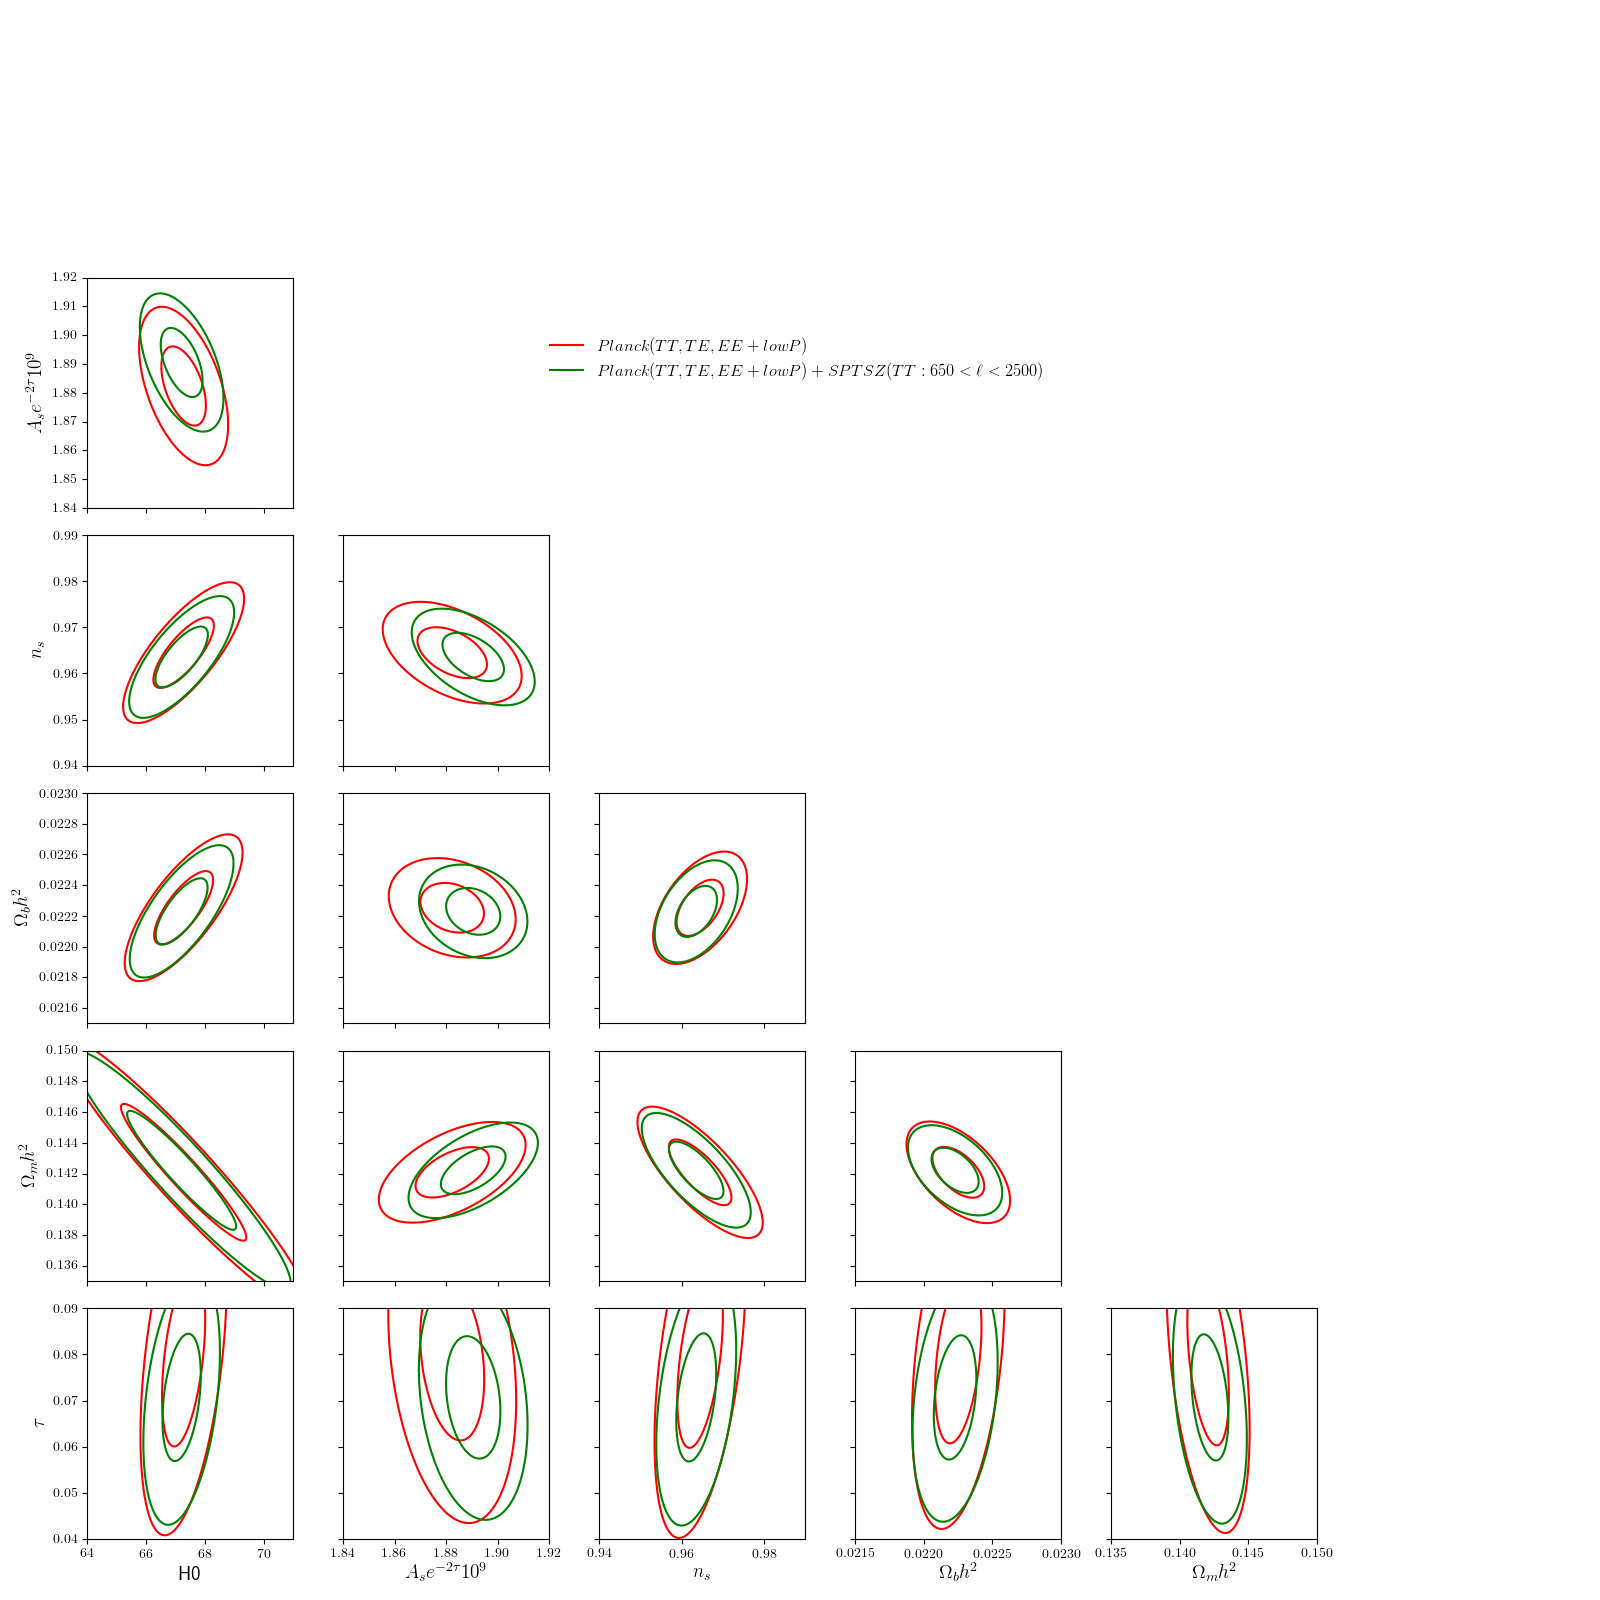

In [73]:
import matplotlib.lines as mlines
convert_names={'H0':'H0','clamp':r'$A_se^{-2 \tau}10^9$','ns':r'$n_s$','ombh2':'$\Omega_bh^2$',
               'ommh2':'$\Omega_mh^2$','tau':r'$\tau$'}
scale={'H0':(64,71),'clamp':(1.84,1.92),'ns':(.94,.99),'ombh2':(.0215,.023),
        'ommh2':(.135,.15),'tau':(.04,.09)}
params=Covp_lcdm.keys()
fig, axes=subplots(len(params),len(params),figsize=(16,16),sharey='row',sharex='col')

for i,p1 in enumerate(params):
    for j,p2 in enumerate(params):
        if i>j:
            sigmap = Covp_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            #sigmaps = Covps_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            sigmapsz = Covpsz_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()

            matplotlib.rc('text', usetex = True)

            sig_contours(Planck_chain.mean([p1,p2]),sigmap,colors = 'r',ax=axes[i,j])
            #sig_contours(Planck_chain.mean([p1,p2]),sigmaps,colors = 'k',ax=axes[i,j])
            sig_contours([PSZ_params[p1],PSZ_params[p2]],sigmapsz,colors = 'g',ax=axes[i,j])

            axes[-1,j].set_xlabel(convert_names[p2], fontsize=14)
            axes[i,0].set_ylabel(convert_names[p1], fontsize=14)
            axes[i,0].set_ylim(scale[p1])
            axes[-1,j].set_xlim(scale[p2])
        else:
            axes[i,j].axis('off')

a=mlines.Line2D([], [], color='r')
#b=mlines.Line2D([], [], color='k')
c=mlines.Line2D([], [], color='g')

legend([a,c],[r'$Planck(TT,TE,EE+lowP)$',
                
                r'$Planck(TT,TE,EE+lowP)+SPTSZ(TT:650<\ell<2500)$'],loc = (-4,5),fontsize = 12,frameon=False)
tight_layout()
savefig('Figures/Param_constraints_planck_planckSPTSZ.pdf')

<IPython.core.display.Javascript object>


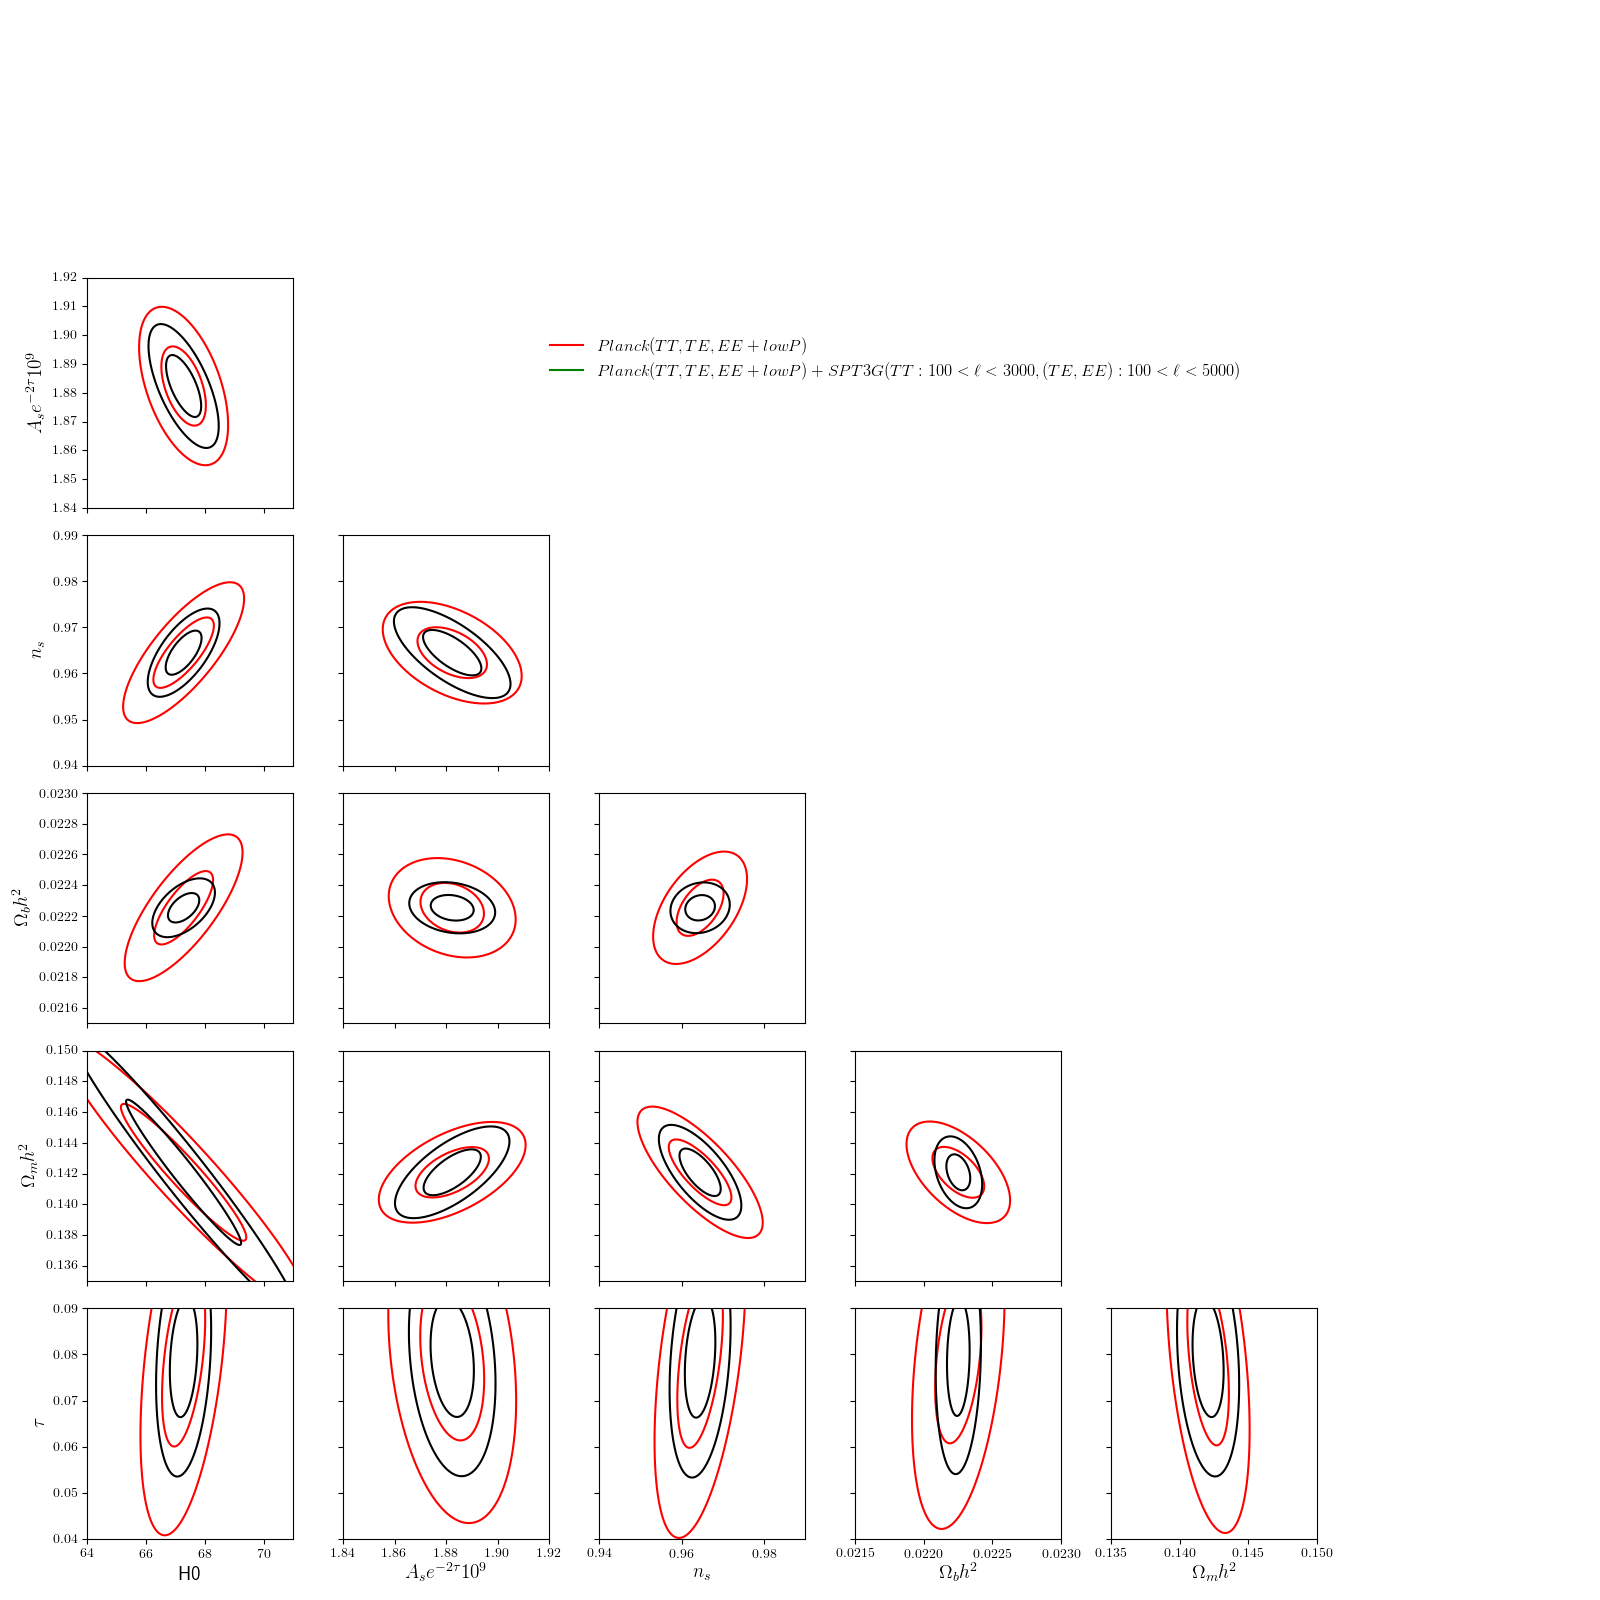

In [74]:
import matplotlib.lines as mlines
convert_names={'H0':'H0','clamp':r'$A_se^{-2 \tau}10^9$','ns':r'$n_s$','ombh2':'$\Omega_bh^2$',
               'ommh2':'$\Omega_mh^2$','tau':r'$\tau$'}
scale={'H0':(64,71),'clamp':(1.84,1.92),'ns':(.94,.99),'ombh2':(.0215,.023),
        'ommh2':(.135,.15),'tau':(.04,.09)}
params=Covp_lcdm.keys()
fig, axes=subplots(len(params),len(params),figsize=(16,16),sharey='row',sharex='col')

for i,p1 in enumerate(params):
    for j,p2 in enumerate(params):
        if i>j:
            sigmap = Covp_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            sigmaps = Covps_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()
            #sigmapsz = Covpsz_lcdm[[p1,p2]].loc[[p1,p2]].as_matrix()

            matplotlib.rc('text', usetex = True)

            sig_contours(Planck_chain.mean([p1,p2]),sigmap,colors = 'r',ax=axes[i,j])
            sig_contours(Planck_chain.mean([p1,p2]),sigmaps,colors = 'k',ax=axes[i,j])
            #sig_contours([PSZ_params[p1],PSZ_params[p2]],sigmapsz,colors = 'g',ax=axes[i,j])

            axes[-1,j].set_xlabel(convert_names[p2], fontsize=14)
            axes[i,0].set_ylabel(convert_names[p1], fontsize=14)
            axes[i,0].set_ylim(scale[p1])
            axes[-1,j].set_xlim(scale[p2])
        else:
            axes[i,j].axis('off')

a=mlines.Line2D([], [], color='r')
b=mlines.Line2D([], [], color='k')
#c=mlines.Line2D([], [], color='g')

legend([a,c],[r'$Planck(TT,TE,EE+lowP)$',
                
                r'$Planck(TT,TE,EE+lowP)+SPT3G(TT:100<\ell<3000,(TE,EE):100<\ell<5000)$'],loc = (-4,5),fontsize = 12,frameon=False)
tight_layout()
savefig('Figures/Param_constraints_planck_planckSPT3G.pdf')

<IPython.core.display.Javascript object>


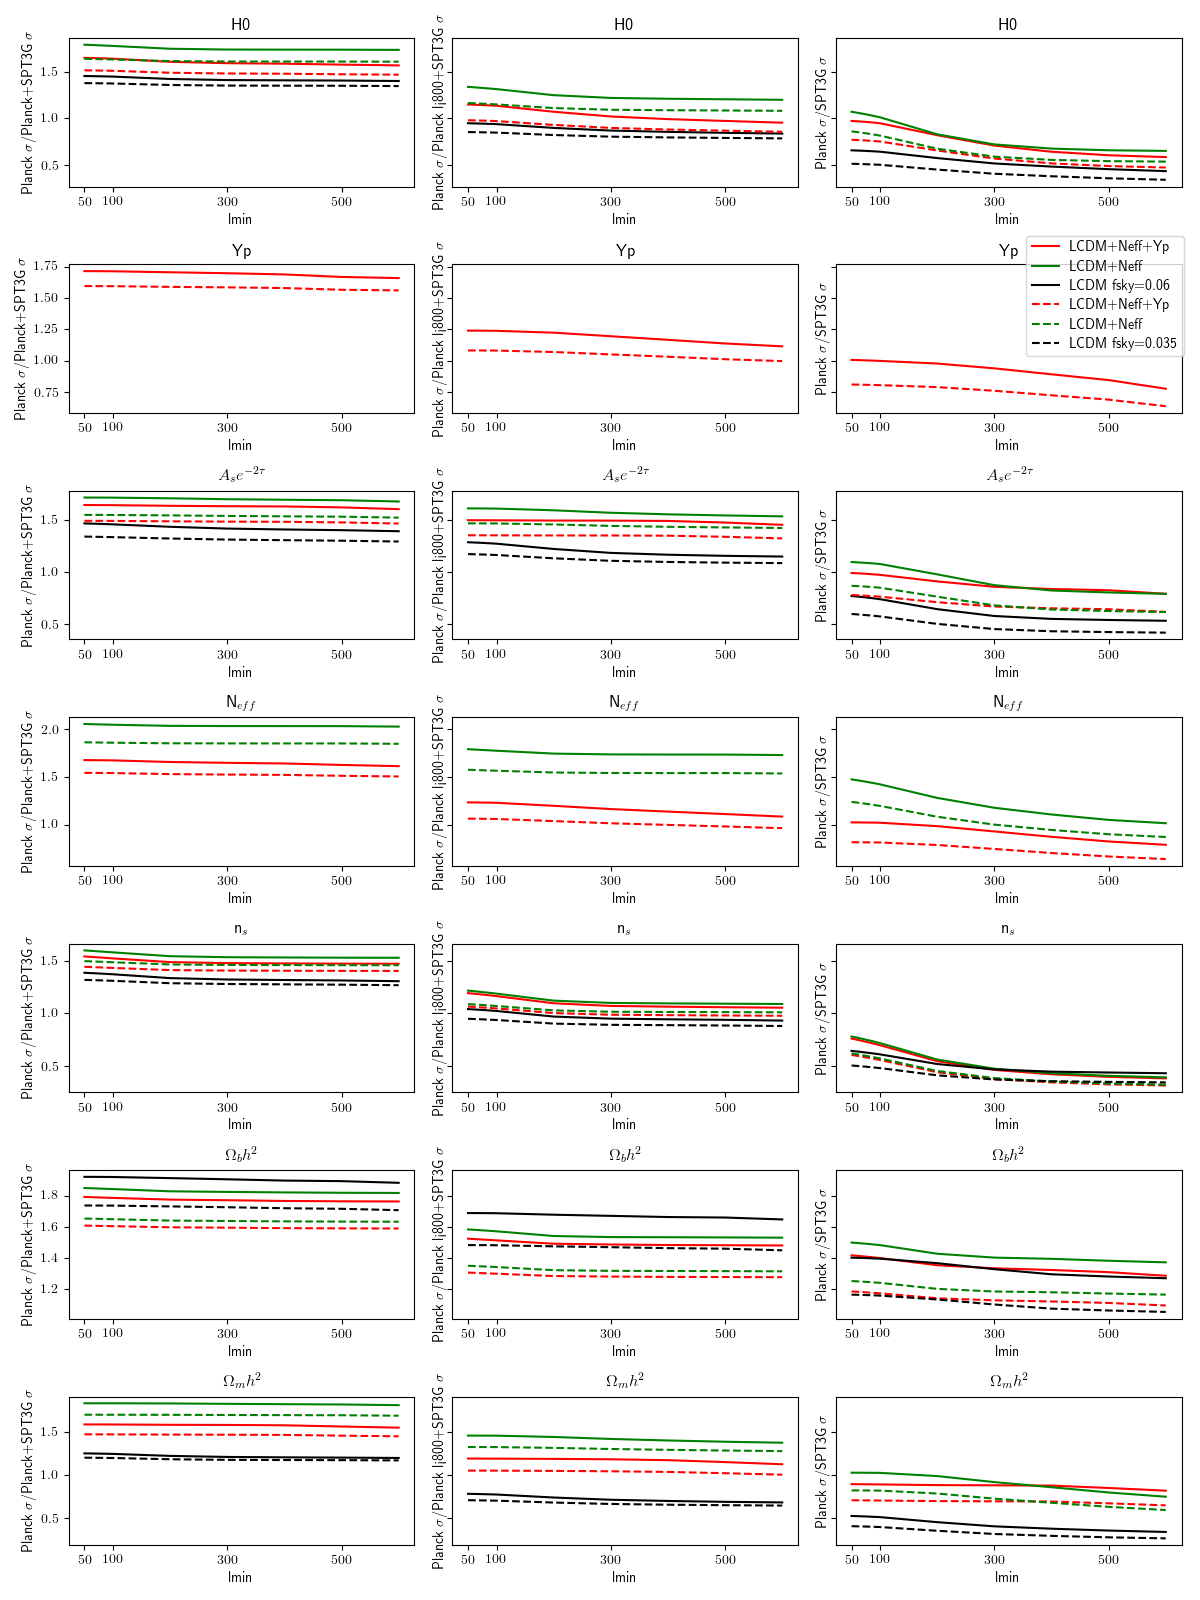

In [70]:
params=Fs_lcdm_neff_yp_lmin_50_700['200'].columns[:-1]
fig, axes=subplots(len(params),3,figsize=(12,16),sharey='row')
lmins=sorted([int(l) for l in Fs_lcdm_neff_yp_lmin_50_700.keys()])
convert_names={'H0':'H0','YHe':'Yp','clamp':r'$A_se^{-2 \tau}$','nnu':'N_{eff}','ns':'n_s','ombh2':'$\Omega_bh^2$',
               'ommh2':'$\Omega_mh^2$'}
yscale={'H0':(.5,2.7),'YHe':(1.1,2.8),'clamp':(.5,2.2),'nnu':(1.5,2.6),'ns':(.5,2.3),'ombh2':(1.5,2.6),
        'ommh2':(.5,2.5)}
for i,p in enumerate(params):
    top = sqrt(Covp_lcdm_neff_yp[p].loc[p])
    bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_neff_yp_lmin_50_700[str(l)]+Fp_lcdm_neff_yp).as_matrix()),
                            index=Fp_lcdm_neff_yp.columns,columns=Fp_lcdm_neff_yp.columns)[p].loc[p]) for l in lmins]
    axes[i,0].plot(lmins,top/bottom,color='r',label='LCDM+Neff+Yp')
    try:
        top = sqrt(Covp_lcdm_neff[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_neff_lmin_50_700[str(l)]+Fp_lcdm_neff).as_matrix()),
                            index=Fp_lcdm_neff.columns,columns=Fp_lcdm_neff.columns)[p].loc[p]) for l in lmins]
        axes[i,0].plot(lmins,top/bottom,color='g',label='LCDM+Neff')
    except KeyError:
        pass
    try:
        top = sqrt(Covp_lcdm[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_lmin_50_700[str(l)]+Fp_lcdm).as_matrix()),
                            index=Fp_lcdm.columns,columns=Fp_lcdm.columns)[p].loc[p]) for l in lmins]
        axes[i,0].plot(lmins,top/bottom,color='k',label='LCDM')
    except KeyError:
        pass
    
    
    top = sqrt(Covp_lcdm_neff_yp[p].loc[p])
    bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_neff_yp_lmin_50_700[str(l)]+Fp_lcdm_neff_yp).as_matrix()),
                            index=Fp_lcdm_neff_yp.columns,columns=Fp_lcdm_neff_yp.columns)[p].loc[p]) for l in lmins]
    axes[i,0].plot(lmins,top/bottom,'--r',label='LCDM+Neff+Yp')
    try:
        top = sqrt(Covp_lcdm_neff[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_neff_lmin_50_700[str(l)]+Fp_lcdm_neff).as_matrix()),
                            index=Fp_lcdm_neff.columns,columns=Fp_lcdm_neff.columns)[p].loc[p]) for l in lmins]
        axes[i,0].plot(lmins,top/bottom,'--g',label='LCDM+Neff')
    except KeyError:
        pass
    try:
        top = sqrt(Covp_lcdm[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_lmin_50_700[str(l)]+Fp_lcdm).as_matrix()),
                            index=Fp_lcdm.columns,columns=Fp_lcdm.columns)[p].loc[p]) for l in lmins]
        axes[i,0].plot(lmins,top/bottom,'--k',label='LCDM')
    except KeyError:
        pass
    axes[i,0].set_xlabel('lmin')
    #axes[i,0].set_ylim(yscale[p])
    axes[i,0].set_ylabel('Planck $\sigma$/Planck+SPT3G $\sigma$')
    axes[i,0].set_title(convert_names[p])
    axes[i,0].set_xticks([50,100,300,500])
    
    

    top = sqrt(Covp_lcdm_neff_yp[p].loc[p])
    bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_neff_yp_lmin_50_700[str(l)]+Fp_800_lcdm_neff_yp).as_matrix()),
                            index=Fp_lcdm_neff_yp.columns,columns=Fp_lcdm_neff_yp.columns)[p].loc[p]) for l in lmins]
    axes[i,1].plot(lmins,top/bottom,color='r',label='LCDM+Neff+Yp')
    try:
        top = sqrt(Covp_lcdm_neff[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_neff_lmin_50_700[str(l)]+Fp_800_lcdm_neff).as_matrix()),
                            index=Fp_lcdm_neff.columns,columns=Fp_lcdm_neff.columns)[p].loc[p]) for l in lmins]
        axes[i,1].plot(lmins,top/bottom,color='g',label='LCDM+Neff')
    except KeyError:
        pass
    try:
        top = sqrt(Covp_lcdm[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_lmin_50_700[str(l)]+Fp_800_lcdm).as_matrix()),
                            index=Fp_lcdm.columns,columns=Fp_lcdm.columns)[p].loc[p]) for l in lmins]
        axes[i,1].plot(lmins,top/bottom,color='k',label='LCDM')
    except KeyError:
        pass
    
    
    top = sqrt(Covp_lcdm_neff_yp[p].loc[p])
    bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_neff_yp_lmin_50_700[str(l)]+Fp_800_lcdm_neff_yp).as_matrix()),
                            index=Fp_lcdm_neff_yp.columns,columns=Fp_lcdm_neff_yp.columns)[p].loc[p]) for l in lmins]
    axes[i,1].plot(lmins,top/bottom,'--r',label='LCDM+Neff+Yp')
    try:
        top = sqrt(Covp_lcdm_neff[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_neff_lmin_50_700[str(l)]+Fp_800_lcdm_neff).as_matrix()),
                            index=Fp_lcdm_neff.columns,columns=Fp_lcdm_neff.columns)[p].loc[p]) for l in lmins]
        axes[i,1].plot(lmins,top/bottom,'--g',label='LCDM+Neff')
    except KeyError:
        pass
    try:
        top = sqrt(Covp_lcdm[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_lmin_50_700[str(l)]+Fp_800_lcdm).as_matrix()),
                            index=Fp_lcdm.columns,columns=Fp_lcdm.columns)[p].loc[p]) for l in lmins]
        axes[i,1].plot(lmins,top/bottom,'--k',label='LCDM')
    except KeyError:
        pass
    axes[i,1].set_xlabel('lmin')
    #axes[i,1].set_ylim(yscale[p])
    axes[i,1].set_ylabel('Planck $\sigma$/Planck l<800+SPT3G $\sigma$')
    axes[i,1].set_title(convert_names[p])
    axes[i,1].set_xticks([50,100,300,500])



    top = sqrt(Covp_lcdm_neff_yp[p].loc[p])
    bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_neff_yp_lmin_50_700[str(l)]).as_matrix()),
                            index=Fp_lcdm_neff_yp.columns,columns=Fp_lcdm_neff_yp.columns)[p].loc[p]) for l in lmins]
    axes[i,2].plot(lmins,top/bottom,'r',label='LCDM+Neff+Yp ')
    try:
        top = sqrt(Covp_lcdm_neff[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_neff_lmin_50_700[str(l)]).as_matrix()),
                            index=Fp_lcdm_neff.columns,columns=Fp_lcdm_neff.columns)[p].loc[p]) for l in lmins]
        axes[i,2].plot(lmins,top/bottom,'g',label='LCDM+Neff ')
    except KeyError:
        pass
    try:
        top = sqrt(Covp_lcdm[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_lcdm_lmin_50_700[str(l)]).as_matrix()),
                            index=Fp_lcdm.columns,columns=Fp_lcdm.columns)[p].loc[p]) for l in lmins]
        axes[i,2].plot(lmins,top/bottom,'k',label='LCDM fsky=0.06')
    except KeyError:
        pass
    
    
    top = sqrt(Covp_lcdm_neff_yp[p].loc[p])
    bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_neff_yp_lmin_50_700[str(l)]).as_matrix()),
                            index=Fp_lcdm_neff_yp.columns,columns=Fp_lcdm_neff_yp.columns)[p].loc[p]) for l in lmins]
    axes[i,2].plot(lmins,top/bottom,'--r',label='LCDM+Neff+Yp ')
    try:
        top = sqrt(Covp_lcdm_neff[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_neff_lmin_50_700[str(l)]).as_matrix()),
                            index=Fp_lcdm_neff.columns,columns=Fp_lcdm_neff.columns)[p].loc[p]) for l in lmins]
        axes[i,2].plot(lmins,top/bottom,'--g',label='LCDM+Neff ')
    except KeyError:
        pass
    try:
        top = sqrt(Covp_lcdm[p].loc[p])
        bottom = [sqrt(pd.DataFrame(inv((Fs_f035_lcdm_lmin_50_700[str(l)]).as_matrix()),
                            index=Fp_lcdm.columns,columns=Fp_lcdm.columns)[p].loc[p]) for l in lmins]
        axes[i,2].plot(lmins,top/bottom,'--k',label='LCDM fsky=0.035')
    except KeyError:
        pass
    axes[i,2].set_xlabel('lmin')
    #axes[i,2].set_ylim(yscale[p])
    axes[i,2].set_ylabel('Planck $\sigma$/SPT3G $\sigma$')
    axes[i,2].set_title(convert_names[p])
    axes[i,2].set_xticks([50,100,300,500])
legend(loc=(.55,8.),fontsize=10)

tight_layout()
savefig('Figures/planckSPT3G_and_SPT3G_improvement_on_planck_params_vs_lmin_100_700.pdf')